In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/country-regional-and-world-gdp/gdp_csv.csv


In [3]:
df1 = pd.read_csv('/kaggle/input/country-regional-and-world-gdp/gdp_csv.csv')

In [12]:
df1.shape

(11507, 4)

In [5]:
df = df1.iloc[:,2:4].values

In [6]:
df 

array([[1.96800000e+03, 2.57606830e+10],
       [1.96900000e+03, 2.84342036e+10],
       [1.97000000e+03, 3.13854997e+10],
       ...,
       [2.01400000e+03, 1.58910492e+10],
       [2.01500000e+03, 1.63046678e+10],
       [2.01600000e+03, 1.66199604e+10]])

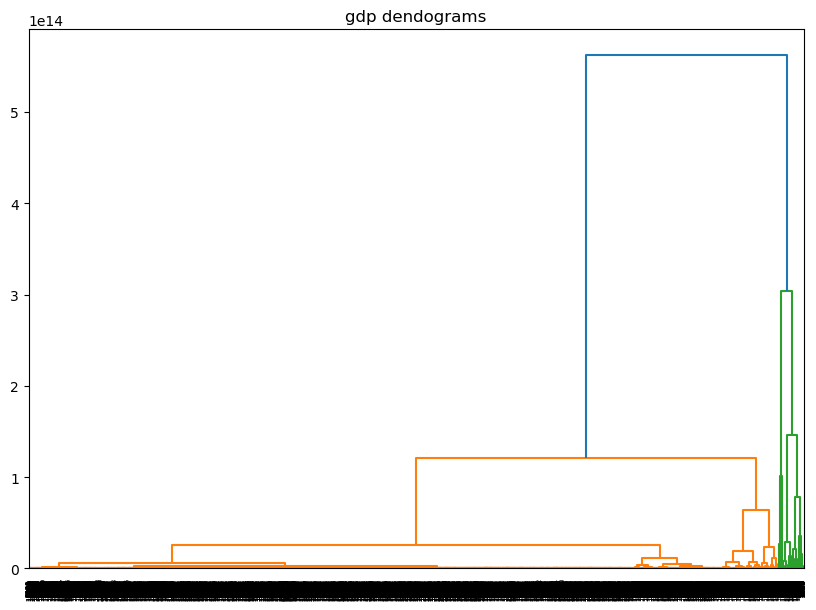

In [7]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
plt.title('gdp dendograms')
dend = shc.dendrogram(shc.linkage(df,method='ward'))

In [9]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
labels_=cluster.fit_predict(df)

In [10]:
labels_

array([1, 1, 1, ..., 1, 1, 1])

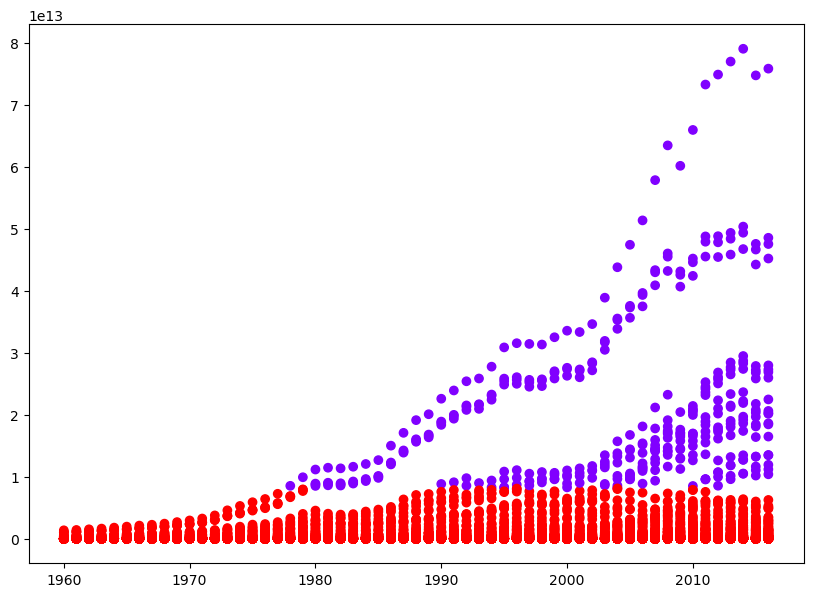

In [11]:
plt.figure(figsize=(10,7))
plt.scatter(df[:,0],df[:,1],c=cluster.labels_,cmap='rainbow')